<a href="https://colab.research.google.com/github/Saby049/NLPPractice/blob/main/DLAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#DL Assignment 1
#TBD (ADD Team Members) 

**1.Import Libraries / Datasets**
  1. Import the required libraries and the dataset
  2. Check the GPU available 

In [60]:
!pip install opendatasets
import opendatasets as od
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import pandas as pd
import os
import requests
from PIL import Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
od.download("https://www.kaggle.com/datasets/chetankv/dogs-cats-images/download")

Skipping, found downloaded files in "./dogs-cats-images" (use force=True to force download)


In [62]:
import os
os.getcwd()

test_dir="./dogs-cats-images/dataset/test_set" #getting our testing data
train_dir="./dogs-cats-images/dataset/training_set" #getting our training data

train_dir_cats = train_dir + '/cats' #storing the cats training images
train_dir_dogs = train_dir + '/dogs' #storing the dogs training images
test_dir_cats = test_dir + '/cats' #storing the cats testing images
test_dir_dogs = test_dir + '/dogs' #storing the dogs testing images
print('number of cats training images - ',len(os.listdir(train_dir_cats))) 
print('number of dogs training images - ',len(os.listdir(train_dir_dogs)))
print('number of cats testing images - ',len(os.listdir(test_dir_cats)))
print('number of dogs testing images - ',len(os.listdir(test_dir_dogs)))



number of cats training images -  4000
number of dogs training images -  4000
number of cats testing images -  1000
number of dogs testing images -  1000


2. **Data Visualization and augmentation** 
  1. Plot at least two samples from each class of the dataset (use matplotlib/ seaborn/any other library).
  2. Apply rotation and height shift augmentation (rotation_range, height_shift_range)to the dataset separately. Print the augmented image and the original image for each class and each augmentation.
  3. Bring the train and test data in the required format.
  4. Print the shapes of train and test data.

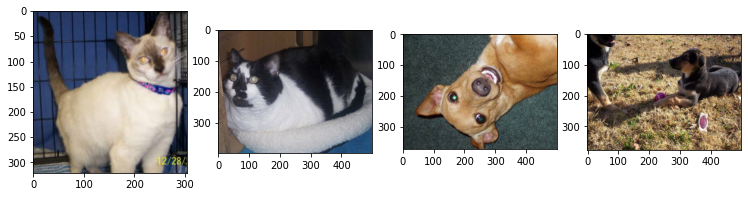

In [63]:
path = []
url = train_dir_cats + '/cat.1079.jpg'
path.append(url)
url = train_dir_cats + '/cat.1154.jpg'
path.append(url)
url = train_dir_dogs + '/dog.3494.jpg'
path.append(url)
url = train_dir_dogs + '/dog.1976.jpg'
path.append(url)
    
plt.figure(figsize=(16,8))
i=1
for elem in path:
    plt.subplot(2,5,i)
    image = mpimg.imread(elem)
    #print(f'shape of the image {i} : {image.shape}')
    plt.imshow(image)
    i+=1
plt.show()

In [64]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator


#Cats Rotation and height shift augmentation

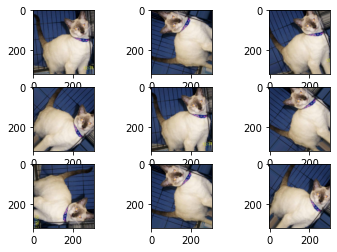

In [65]:
# load the image
img = load_img(train_dir_cats + '/cat.1079.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

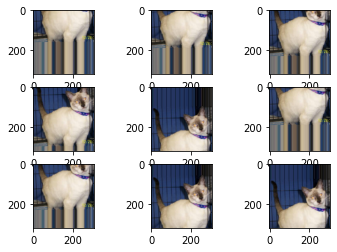

In [66]:
# load the image
img = load_img(train_dir_cats + '/cat.1079.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

# Dogs Rotation and Height Shift Augmentation

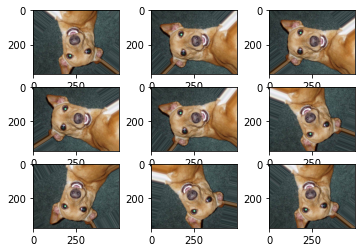

In [67]:
# load the image
img = load_img(train_dir_dogs + '/dog.3494.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

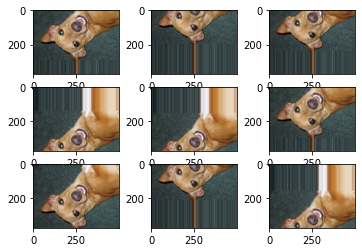

In [68]:
# load the image
img = load_img(train_dir_dogs + '/dog.3494.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

# Bringing the train and test data in the required format.

In [77]:
import tensorflow as tf
batch_size = 1
img_height = 180
img_width = 180
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size   
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size   
)



Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [78]:
print(train_ds._flat_shapes)
print(test_ds._flat_shapes)

[TensorShape([None, 180, 180, 3]), TensorShape([None])]
[TensorShape([None, 180, 180, 3]), TensorShape([None])]


In [79]:
class_name = train_ds.class_names
print(class_name)

['cats', 'dogs']


In [80]:
def normalize(images, labels):
  image = tf.cast(images,tf.float32)
  images /= 255
  return images, labels

train_ds1 = train_ds.map(normalize)
test_ds1 = test_ds.map(normalize)

(1, 180, 180, 3)


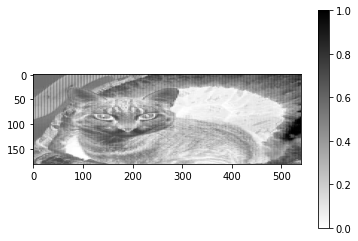

In [81]:
for image, label in test_ds1.take(3):
  print(image.shape)
  break
image = image.numpy().reshape((180,540))
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

tf.Tensor([0], shape=(1,), dtype=int32)
tf.Tensor([0], shape=(1,), dtype=int32)
tf.Tensor([1], shape=(1,), dtype=int32)
tf.Tensor([0], shape=(1,), dtype=int32)
tf.Tensor([0], shape=(1,), dtype=int32)
tf.Tensor([0], shape=(1,), dtype=int32)
tf.Tensor([1], shape=(1,), dtype=int32)
tf.Tensor([0], shape=(1,), dtype=int32)
tf.Tensor([0], shape=(1,), dtype=int32)
tf.Tensor([0], shape=(1,), dtype=int32)
tf.Tensor([1], shape=(1,), dtype=int32)
tf.Tensor([1], shape=(1,), dtype=int32)
tf.Tensor([1], shape=(1,), dtype=int32)
tf.Tensor([1], shape=(1,), dtype=int32)
tf.Tensor([0], shape=(1,), dtype=int32)
tf.Tensor([0], shape=(1,), dtype=int32)
tf.Tensor([1], shape=(1,), dtype=int32)
tf.Tensor([1], shape=(1,), dtype=int32)
tf.Tensor([1], shape=(1,), dtype=int32)
tf.Tensor([1], shape=(1,), dtype=int32)
tf.Tensor([0], shape=(1,), dtype=int32)
tf.Tensor([0], shape=(1,), dtype=int32)
tf.Tensor([0], shape=(1,), dtype=int32)
tf.Tensor([0], shape=(1,), dtype=int32)
tf.Tensor([0], shape=(1,), dtype=int32)


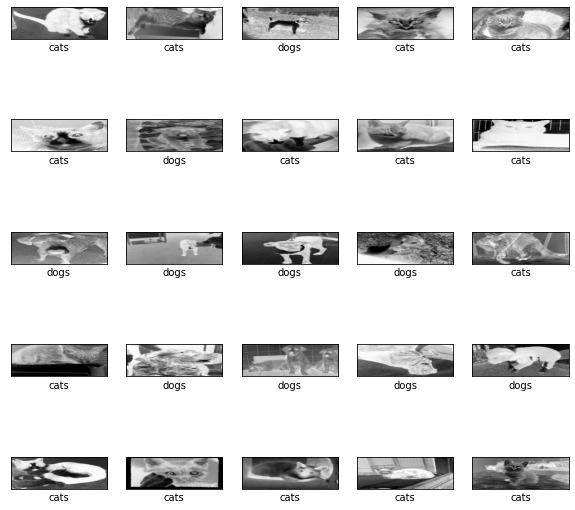

In [85]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_ds1.take(25):
  image = image.numpy().reshape((180,540))
  print(label)
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image,cmap=plt.cm.binary)
  plt.xlabel(train_ds.class_names[int(label)])
  i+=1
plt.show()


In [96]:
model = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(180,180,3)),
                              tf.keras.layers.Dense(180, activation=tf.nn.tanh),
                              tf.keras.layers.Dense(180, activation=tf.nn.tanh),
                              tf.keras.layers.Dense(180, activation=tf.nn.tanh),
                              tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [97]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 97200)             0         
                                                                 
 dense_4 (Dense)             (None, 180)               17496180  
                                                                 
 dense_5 (Dense)             (None, 180)               32580     
                                                                 
 dense_6 (Dense)             (None, 180)               32580     
                                                                 
 dense_7 (Dense)             (None, 2)                 362       
                                                                 
Total params: 17,561,702
Trainable params: 17,561,702
Non-trainable params: 0
_________________________________________________________________


In [98]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [99]:
BATCH_SIZE=32
train_dataset = train_ds.batch(BATCH_SIZE)
test_dataset = test_ds.batch(BATCH_SIZE)

In [111]:
import math
model.fit(train_ds, epochs=10,steps_per_epoch=(180/32))


Epoch 1/10
5/5 [==============================] - 0s 18ms/step - loss: 0.6789 - accuracy: 0.6667
Epoch 2/10
5/5 [==============================] - 0s 12ms/step - loss: 0.8606 - accuracy: 0.5000
Epoch 3/10
5/5 [==============================] - 0s 10ms/step - loss: 0.8480 - accuracy: 0.3333
Epoch 4/10
5/5 [==============================] - 0s 10ms/step - loss: 0.7824 - accuracy: 0.3333
Epoch 5/10
5/5 [==============================] - 0s 9ms/step - loss: 0.9191 - accuracy: 0.1667
Epoch 6/10
5/5 [==============================] - 0s 8ms/step - loss: 0.6622 - accuracy: 0.5000
Epoch 7/10
5/5 [==============================] - 0s 8ms/step - loss: 0.8551 - accuracy: 0.3333
Epoch 8/10
5/5 [==============================] - 0s 8ms/step - loss: 0.6476 - accuracy: 0.6667
Epoch 9/10
5/5 [==============================] - 0s 8ms/step - loss: 0.6580 - accuracy: 0.6667
Epoch 10/10
5/5 [==============================] - 0s 7ms/step - loss: 0.8157 - accuracy: 0.1667


In [112]:
test_loss, test_accuracy = model.evaluate(test_ds,steps=180)
print(test_accuracy)

180/180 [==============================] - 1s 4ms/step - loss: 0.6986 - accuracy: 0.5000
0.5


In [130]:
p_cat, p_dog = [] , []
for test_images, test_labels in test_ds1:
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)
  p_cat.append(predictions[0][0])
  p_dog.append(predictions[0][1])
  

In [131]:
np.argmax(p_cat)

1738

In [132]:
print(p_cat[1738])

0.44824114


In [136]:
print(p_dog[np.argmin(p_dog)])
print(p_cat[np.argmin(p_cat)])


0.5517589
0.44770396


In [134]:
p_dog[1954]

0.55229604